In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [36]:
df = pd.read_csv('customer_behavior_analytcis.csv')

df.head()


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [37]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [38]:
df.isnull().sum()


,0
total_purchases,20
avg_cart_value,20
total_time_spent,0
product_click,20
discount_counts,0
customer_id,0


In [39]:
df[df['total_purchases'].isnull()]

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
97,NaN,NaN,117.04,NaN,0.0,CM00097
139,NaN,NaN,33.76,NaN,3.0,CM00139
212,NaN,NaN,42.70,NaN,0.0,CM00212
253,NaN,NaN,21.28,NaN,12.0,CM00253
294,NaN,NaN,47.80,NaN,2.0,CM00294
310,NaN,NaN,82.11,NaN,0.0,CM00310
317,NaN,NaN,55.19,NaN,0.0,CM00317
353,NaN,NaN,45.26,NaN,1.0,CM00353
409,NaN,NaN,22.95,NaN,10.0,CM00409
425,NaN,NaN,28.41,NaN,7.0,CM00425


In [40]:
missing_rows = df[df['total_purchases'].isnull()]

print(missing_rows[['total_time_spent', 'discount_counts']].describe())

print("Mean total_time_spent in missing rows:", missing_rows['total_time_spent'].mean())
print("Mean discount_counts in missing rows:", missing_rows['discount_counts'].mean())

       total_time_spent  discount_counts
count         20.000000        20.000000
mean          47.968000         4.500000
std           30.675223         5.501196
min            6.610000         0.000000
25%           24.610000         0.000000
50%           43.980000         1.500000
75%           59.960000        10.250000
max          117.040000        16.000000
Mean total_time_spent in missing rows: 47.968
Mean discount_counts in missing rows: 4.5


In [41]:

complete_rows = df.dropna()


print("Complete Rows Mean:")
print(complete_rows[['total_time_spent', 'discount_counts']].mean())

print("\nOverall Dataset Mean (including missing rows):")
print(df[['total_time_spent', 'discount_counts']].mean())

Complete Rows Mean:
total_time_spent    49.376966
discount_counts      4.309499
dtype: float64

Overall Dataset Mean (including missing rows):
total_time_spent    49.348759
discount_counts      4.313313
dtype: float64


In [42]:
df = df.dropna()

In [43]:
print("Missing values after dropping:", df.isnull().sum())

Missing values after dropping: total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


In [44]:
df = df.set_index('customer_id')

In [45]:
print(df.head())
print(df.info())

             total_purchases  avg_cart_value  total_time_spent  product_click  \
customer_id                                                                     
CM00000                  7.0          129.34             52.17           18.0   
CM00001                 22.0           24.18              9.19           15.0   
CM00002                  2.0           32.18             90.69           50.0   
CM00003                 25.0           26.85             11.22           16.0   
CM00004                  7.0          125.45             34.19           30.0   

             discount_counts  
customer_id                   
CM00000                  0.0  
CM00001                  7.0  
CM00002                  2.0  
CM00003                 10.0  
CM00004                  3.0  
<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, CM00000 to CM00998
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_p

Summary Statistics:
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  

Plotting Distributions:


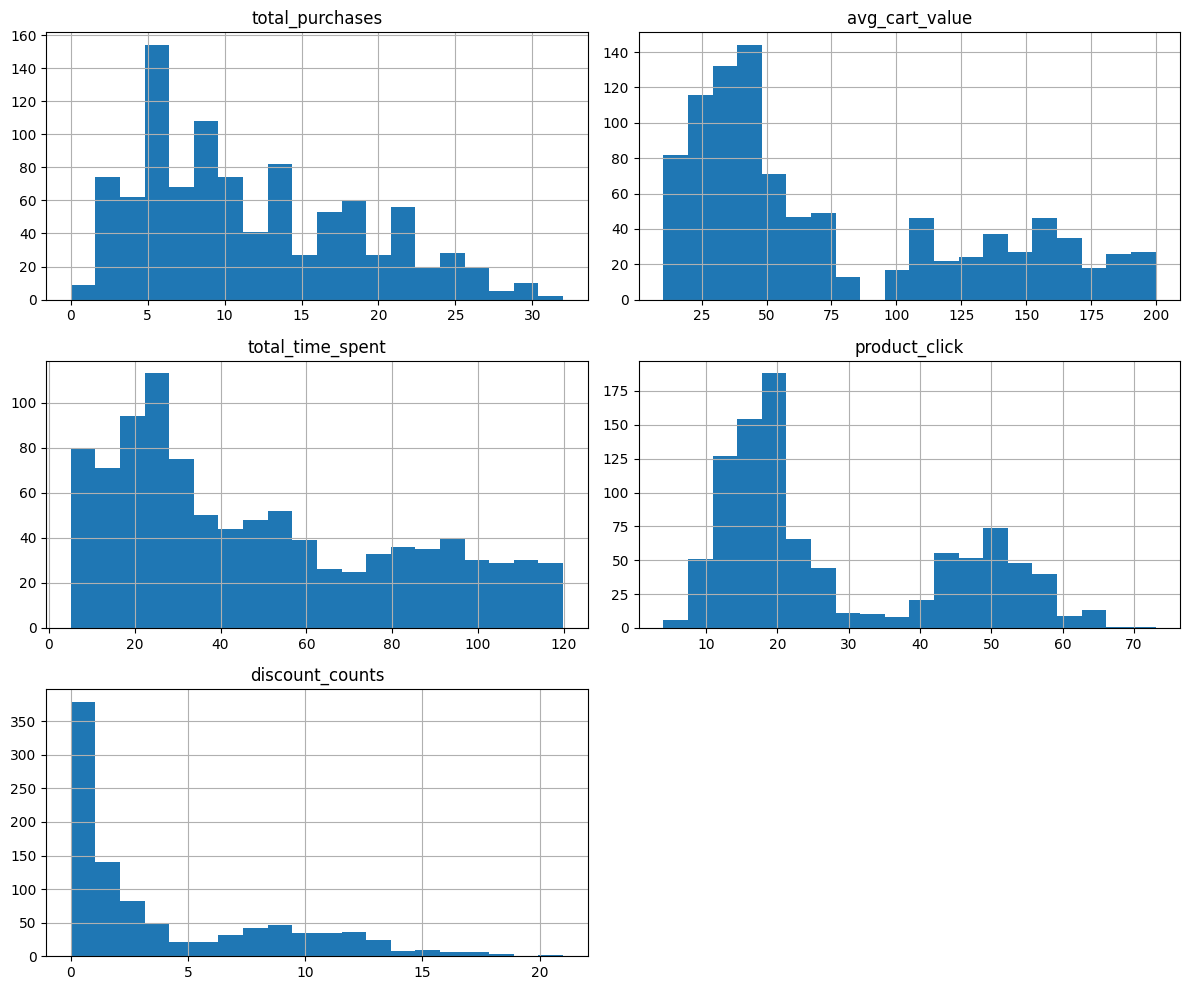


Correlation Matrix:


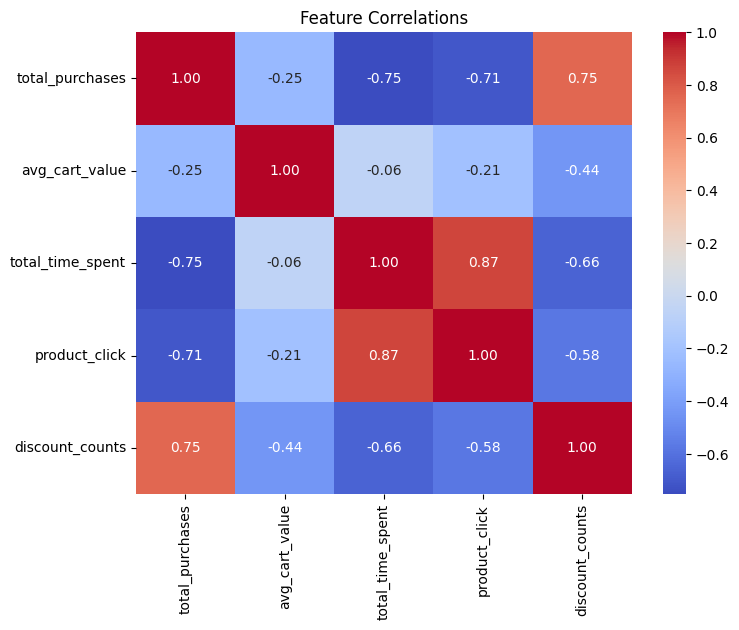


Generating Pair Plots:


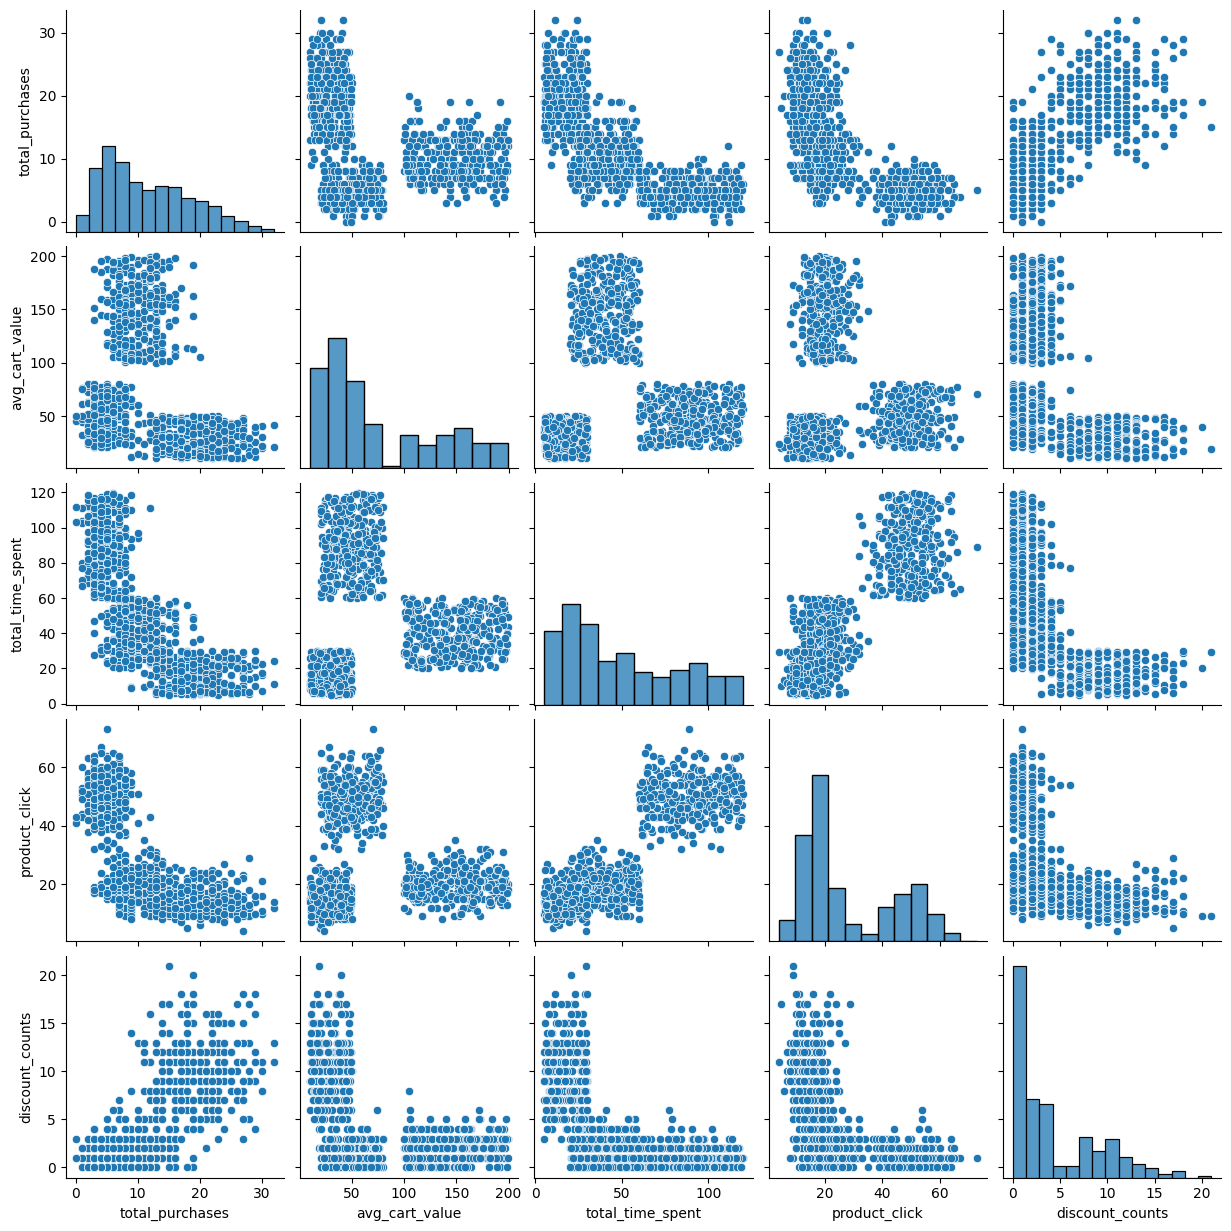


Plotting Box Plots for Outlier Detection:


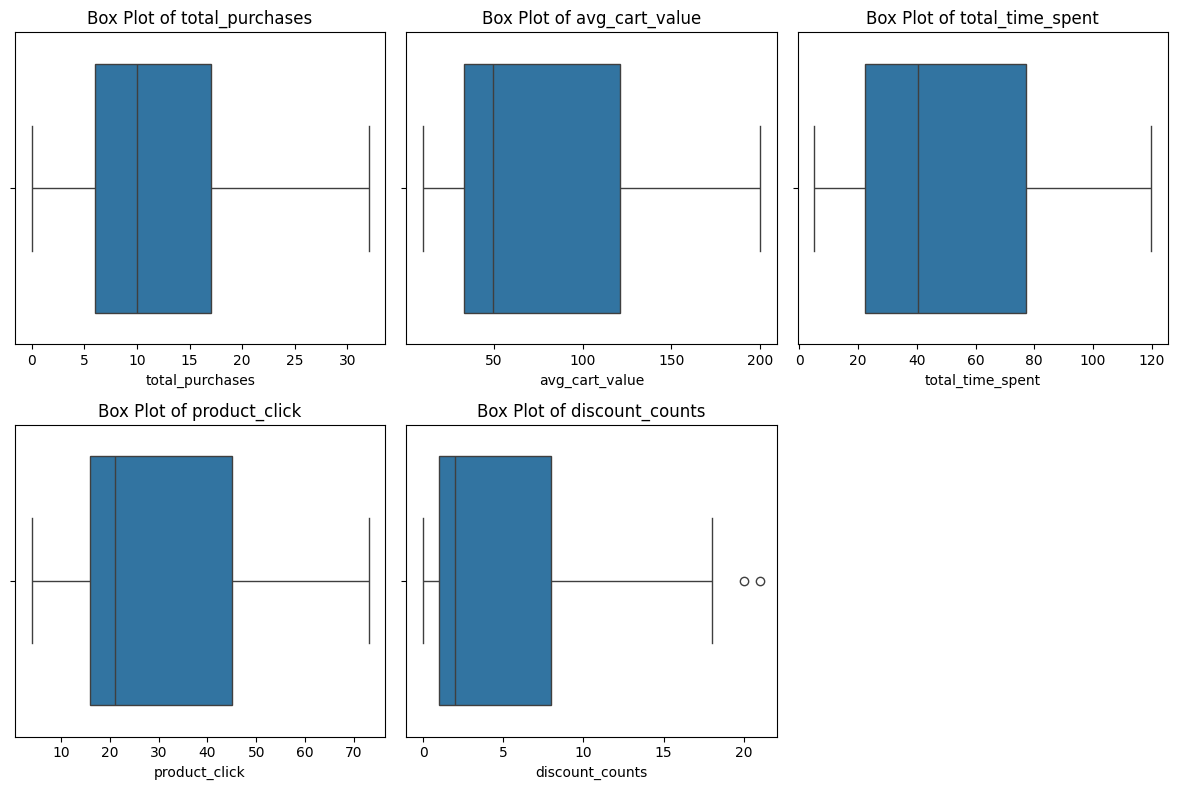

In [46]:

print("Summary Statistics:")
print(df.describe())

print("\nPlotting Distributions:")
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

print("\nGenerating Pair Plots:")
sns.pairplot(df)
plt.show()

print("\nPlotting Box Plots for Outlier Detection:")
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [47]:
df_log = df.apply(np.log1p)

In [48]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

In [50]:
print("silhouette_score:", silhouette_score(df_scaled, clusters))

silhouette_score: 0.5519404975541138


In [51]:
print(df.groupby('cluster').mean())

         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.175385      147.327169         40.284369      19.895385   
1              19.711656       30.399509         17.453988      14.944785   
2               4.862805       49.029848         90.114726      49.716463   

         discount_counts  
cluster                   
0               1.972308  
1               9.938650  
2               1.030488  


In [52]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


In [53]:
print(df['cluster'].value_counts())


cluster
2    328
1    326
0    325
Name: count, dtype: int64


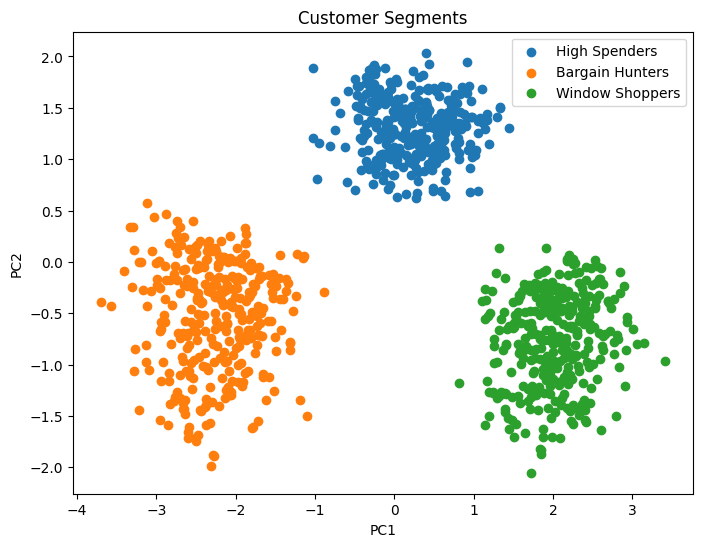

In [54]:

cluster_map = {
    0: "High Spenders",
    1: "Bargain Hunters",
    2: "Window Shoppers"
}


df['cluster_name'] = df['cluster'].map(cluster_map)

plt.figure(figsize=(8,6))
for cluster_label, cluster_name in cluster_map.items():

    subset = pca_result[df['cluster'] == cluster_label]

    plt.scatter(
        subset[:, 0],
        subset[:, 1],
        label=cluster_name
    )


plt.title('Customer Segments')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [55]:
df.loc['CM00429']


,CM00429
total_purchases,13.0
avg_cart_value,45.78
total_time_spent,15.76
product_click,16.0
discount_counts,13.0
cluster,1
cluster_name,Bargain Hunters


In [56]:
df.loc[['CM00429', 'CM00730', 'CM00581']]


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,cluster,cluster_name
customer_id,,,,,,,
CM00429,13.0,45.78,15.76,16.0,13.0,1,Bargain Hunters
CM00730,8.0,120.88,32.68,15.0,2.0,0,High Spenders
CM00581,5.0,73.00,92.83,50.0,1.0,2,Window Shoppers


In [57]:
print("Davies-Bouldin Score:", davies_bouldin_score(df_scaled, kmeans.labels_))

Davies-Bouldin Score: 0.6731833429813877
